# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
print(hospital_read_df.shape)
hospital_read_df.head()

(16860, 12)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16855,BERTRAND CHAFFEE HOSPITAL,330111,NY,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16856,CROWNPOINT HEALTHCARE FACILITY,320062,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16858,GALLUP INDIAN MEDICAL CENTER,320061,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16859,UNIVERSITY OF LOUISVILLE HOSPITAL,180141,KY,READM-30-HIP-KNEE-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [13]:
hospital_read_df.columns
ratio = hospital_read_df['Predicted Readmission Rate'].div(hospital_read_df['Expected Readmission Rate'])
ratio[:5], hospital_read_df.loc[:6,'Excess Readmission Ratio']

(0    1.928571
 1    1.735849
 2    1.583333
 3    1.578947
 4    1.518519
 dtype: float64, 0    1.9095
 1    1.7521
 2    1.5836
 3    1.5760
 4    1.5308
 5    1.5189
 Name: Excess Readmission Ratio, dtype: float64)

****
## Preliminary Analysis

In [15]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [16]:

clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [23]:
df = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']!=0]
clean_hospital_read_df.shape, df.shape
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [26]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,11497
Total Missing (%),7.7%
Total size in memory,1.1 MiB
Average record size in memory,104.0 B
Numeric,6
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,4


Based on the basic checking of the data, we can see that the start date and end state contain only one value, footnote is empty. I would like to remove them. Excess Readmission ratio is calculated based on predicted Readmission Rate divided by expected Readmission Rate. 

In [27]:
df = df.drop(['Start Date', 'End Date', 'Footnote'], axis=1)

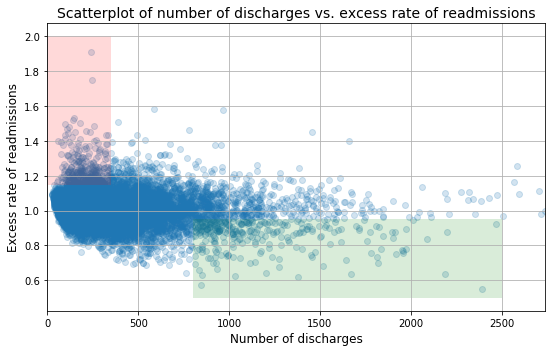

In [24]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Ideas
I am going to try different partition of the data based on their location. There are two kinds of regions division. One has 9 regions based on Census Bureau, and the other one has 4 regions based on federal definition.

In [47]:
regions = pd.read_csv('us census bureau regions and divisions.csv', header=0)
regions.head()
reg = regions.groupby('Division').groups
for k,v in reg.items():
    reg[k] = regions.loc[v, 'State Code'].values
reg

{'East North Central': array(['IL', 'IN', 'MI', 'OH', 'WI'], dtype=object),
 'East South Central': array(['AL', 'KY', 'MS', 'TN'], dtype=object),
 'Middle Atlantic': array(['NJ', 'NY', 'PA'], dtype=object),
 'Mountain': array(['AZ', 'CO', 'ID', 'MT', 'NM', 'NV', 'UT', 'WY'], dtype=object),
 'New England': array(['CT', 'MA', 'ME', 'NH', 'RI', 'VT'], dtype=object),
 'Pacific': array(['AK', 'CA', 'HI', 'OR', 'WA'], dtype=object),
 'South Atlantic': array(['DC', 'DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV'], dtype=object),
 'West North Central': array(['IA', 'KS', 'MN', 'MO', 'ND', 'NE', 'SD'], dtype=object),
 'West South Central': array(['AR', 'LA', 'OK', 'TX'], dtype=object)}

In [61]:
for name, v in reg.items():
    if 'MD' in v:
        f = name
f

'South Atlantic'

In [62]:
# Make a list with each of the regions by state.
df['region'] = np.nan

def finding_regions(s):
    for name, v in reg.items():
        if s in v:
            f = name
    return f

df['region'] = df['State'].apply(finding_regions)
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,region
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,South Atlantic
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,South Atlantic
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,South Atlantic
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,Pacific
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,Middle Atlantic


(25, 6793)

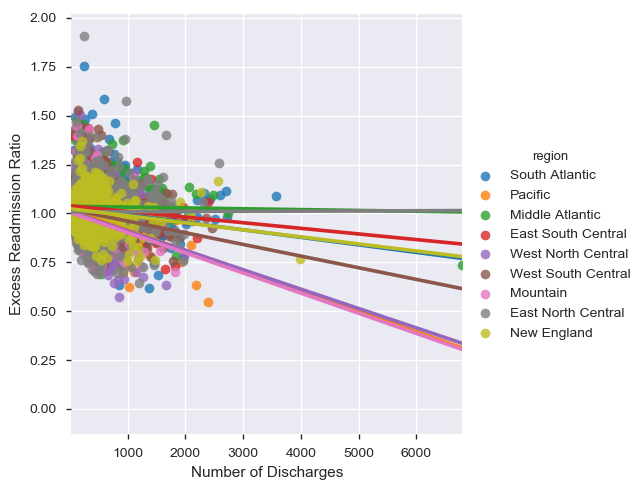

In [72]:
# for i in set(df.region):
#     temp = df.loc[df.region==i]
#     plt.scatter(temp['Number of Discharges'], temp['Excess Readmission Ratio'])
#     plt.show()
import seaborn as sns
sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio', data=df, hue='region', ci=None)
plt.xlim([min(df['Number of Discharges']), max(df['Number of Discharges'])])

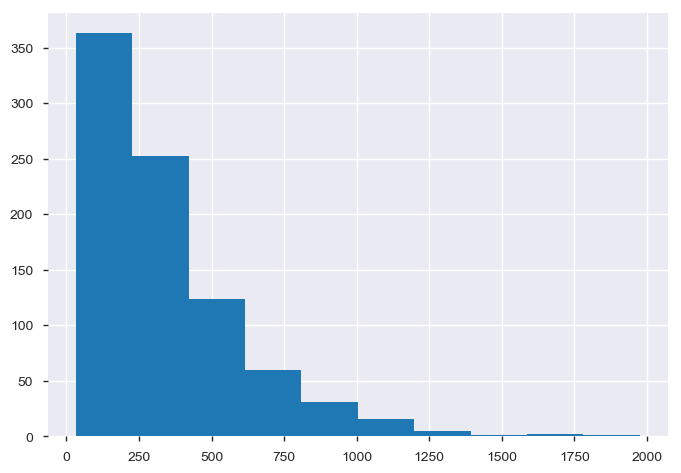

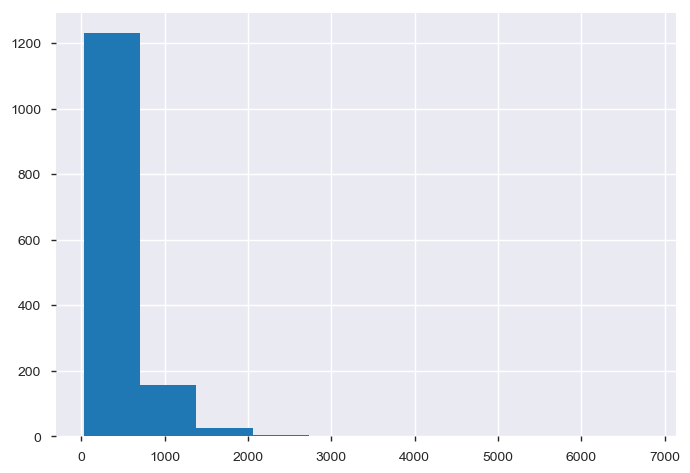

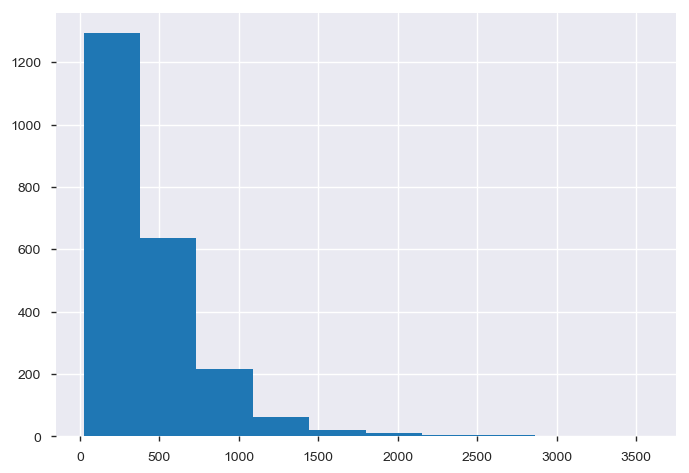

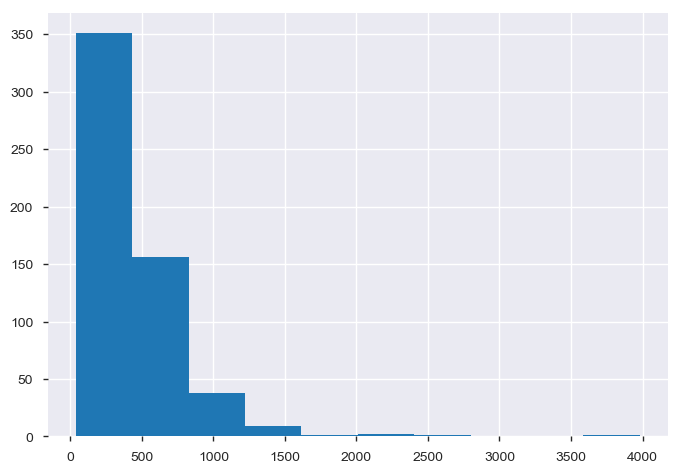

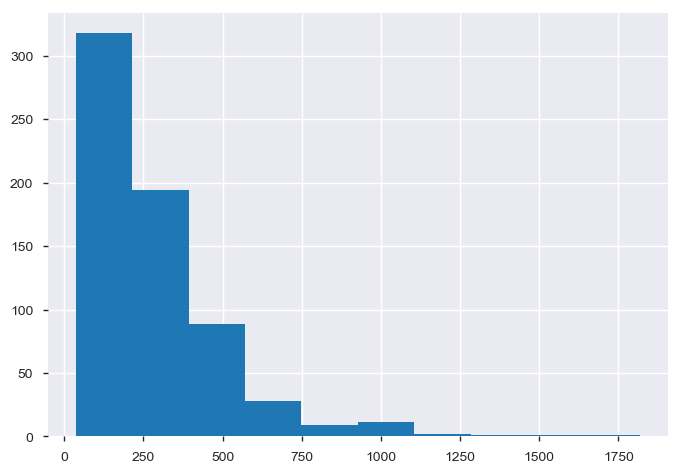

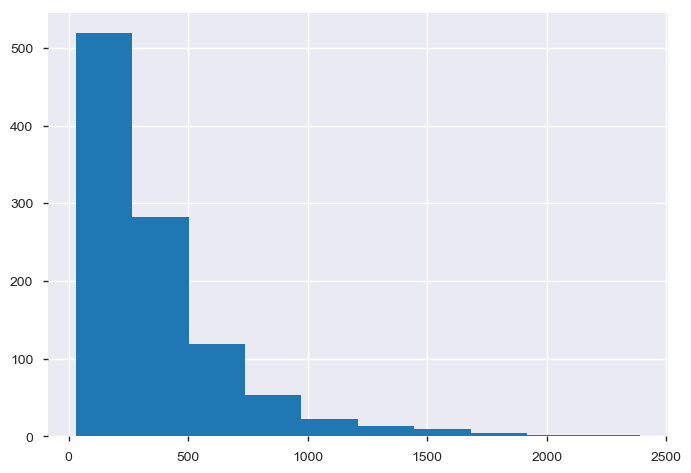

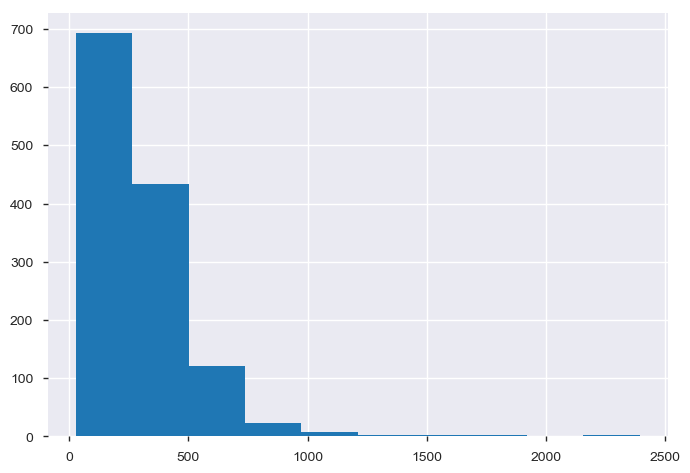

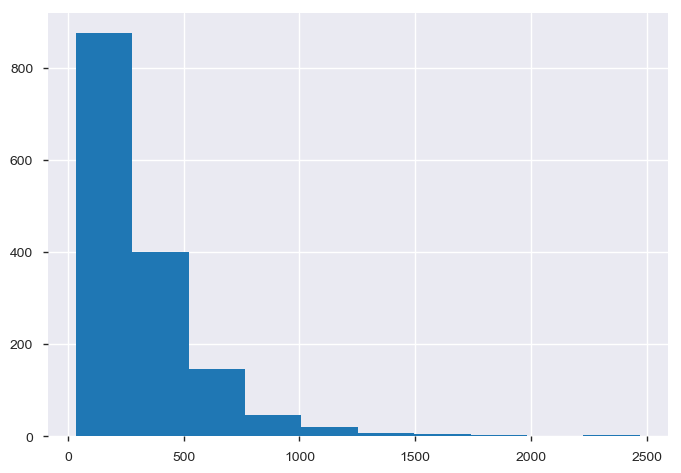

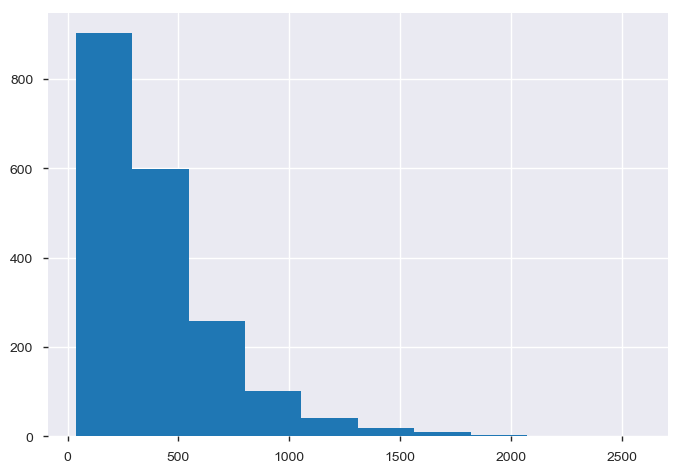

In [77]:
for i in set(df.region):
    temp = df.loc[df.region==i]#.loc[df['Number of Discharges']<1000]
    plt.hist(temp['Number of Discharges'])
    plt.show();

In [76]:
df['excess'] = [1 if i>1 else 0 for i in df['Excess Readmission Ratio']]

In [78]:
df['Number of Discharges'].describe()

count    11497.000000
mean       365.466209
std        308.754590
min         25.000000
25%        160.000000
50%        282.000000
75%        474.000000
max       6793.000000
Name: Number of Discharges, dtype: float64

In [87]:
bins = [160, 280, 470]
temp = pd.DataFrame(np.digitize(df['Number of Discharges'], bins))
temp[0].value_counts()

3    2931
0    2874
2    2859
1    2833
Name: 0, dtype: int64

In [258]:
def PerStackBar_label_two(col1, df, m, title, figsize=(18,12), barWidth = 0.5, l=['Not Excess','Excess']):
    agedf = df.groupby(col1).count().iloc[:,0]
    pivot = pd.crosstab(df[col1], df.excess)
    per = pivot.div((pivot.sum(axis=1)), axis=0)
    greenBars = per.loc[:,1]
    orangeBars = per.loc[:,0]
    v = np.hstack((greenBars, orangeBars))
    r = list(range(len(set(df[col1]))))
    
    fig,  axes= plt.subplots(2,1,figsize=figsize)
    axes[0].bar(r, agedf, color='blue',width=barWidth)
    t=0
    for i in axes[0].patches:
        axes[0].text(i.get_x()+0.2, i.get_height()+0.1, agedf.iloc[t],  fontsize=10)
        t+=1
    axes[0].set_xticks(r)
    axes[0].set_xticklabels([m[i] for i in greenBars.index])

    
    axes[1].bar(r, greenBars, color='#b5ffb9', edgecolor='white',width=barWidth, label=l[1])
    axes[1].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white',width=barWidth,label=l[0])
    t=0
    for i in axes[1].patches:
        if t<len(r):
            axes[1].text(i.get_x()+0.22, i.get_height()/2, str(round(v[t]*100,1))+'%', fontsize=12, ha='center', va='center',
                color='black')
        else:
            axes[1].text(i.get_x()+0.22, 0.9, str(round(v[t]*100,1))+'%', fontsize=10, ha='center', va='center',
                color='black')

        t+=1
    axes[1].plot([r[0]-0.35, r[-1]+0.35], [df.excess.mean(), df.excess.mean()])
    axes[1].text(r[0]-0.32, df.excess.mean()+0.02, str(round(df.excess.mean()*100,1))+'%')
    axes[1].set_xticks(r)
    axes[1].set_xticklabels([m[i] for i in greenBars.index])
    axes[1].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    axes[0].set_title(title)
    axes[0].set_xlim([r[0]-0.35, r[-1]+0.35])
    axes[1].set_xlim([r[0]-0.35, r[-1]+0.35])
    ;

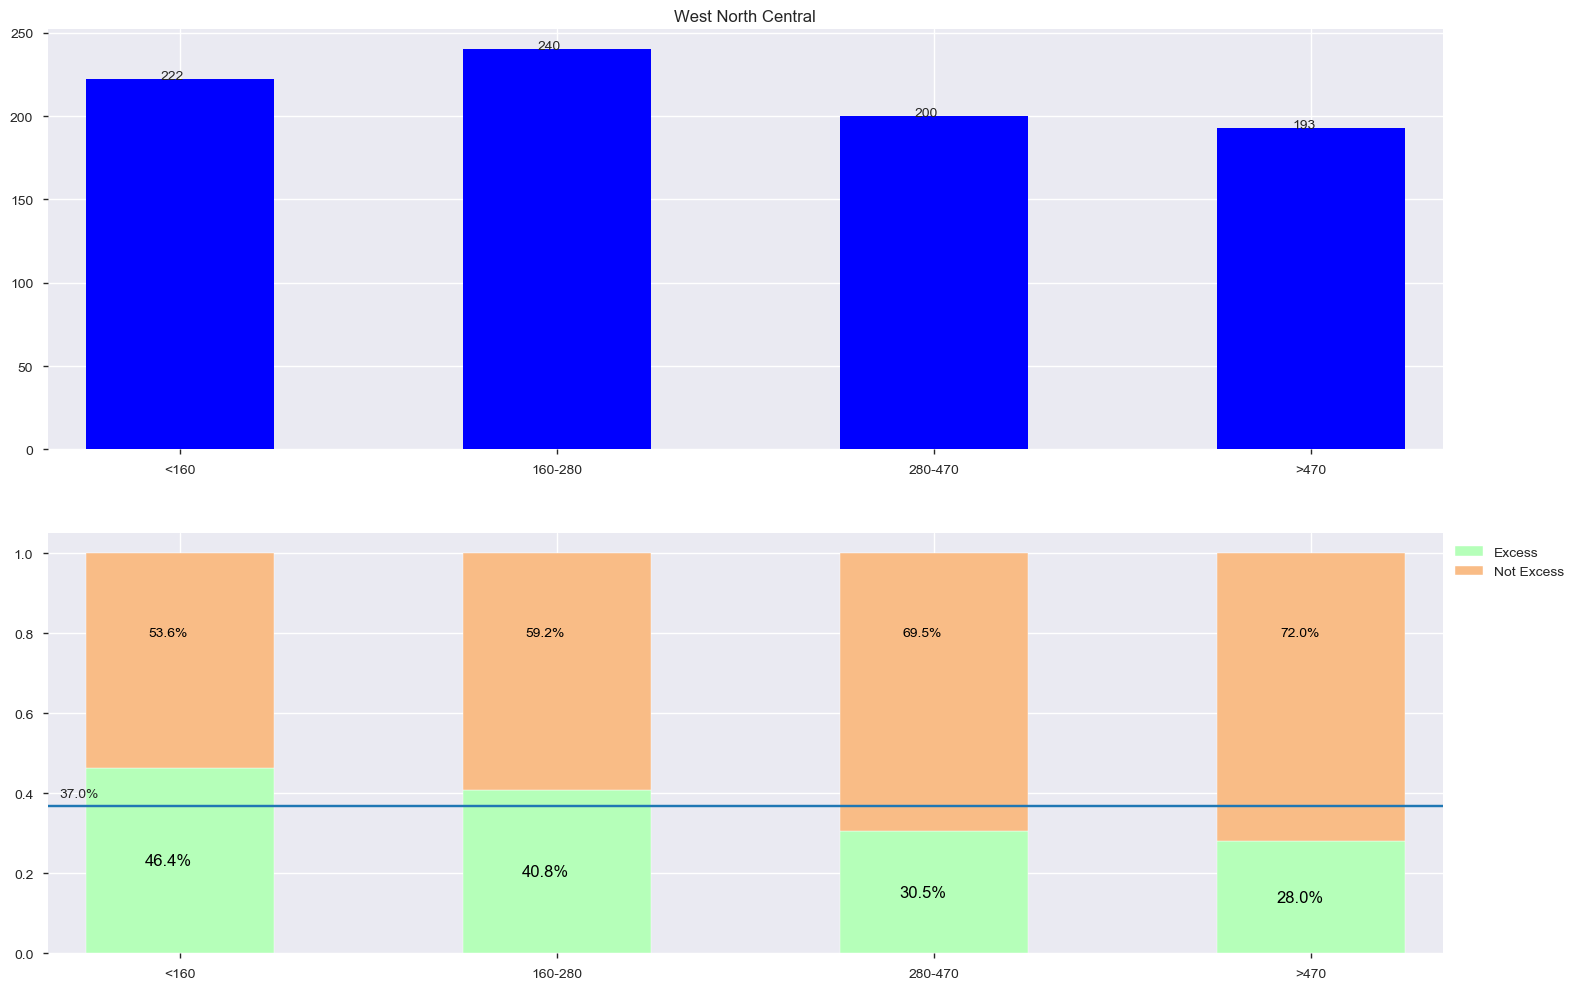

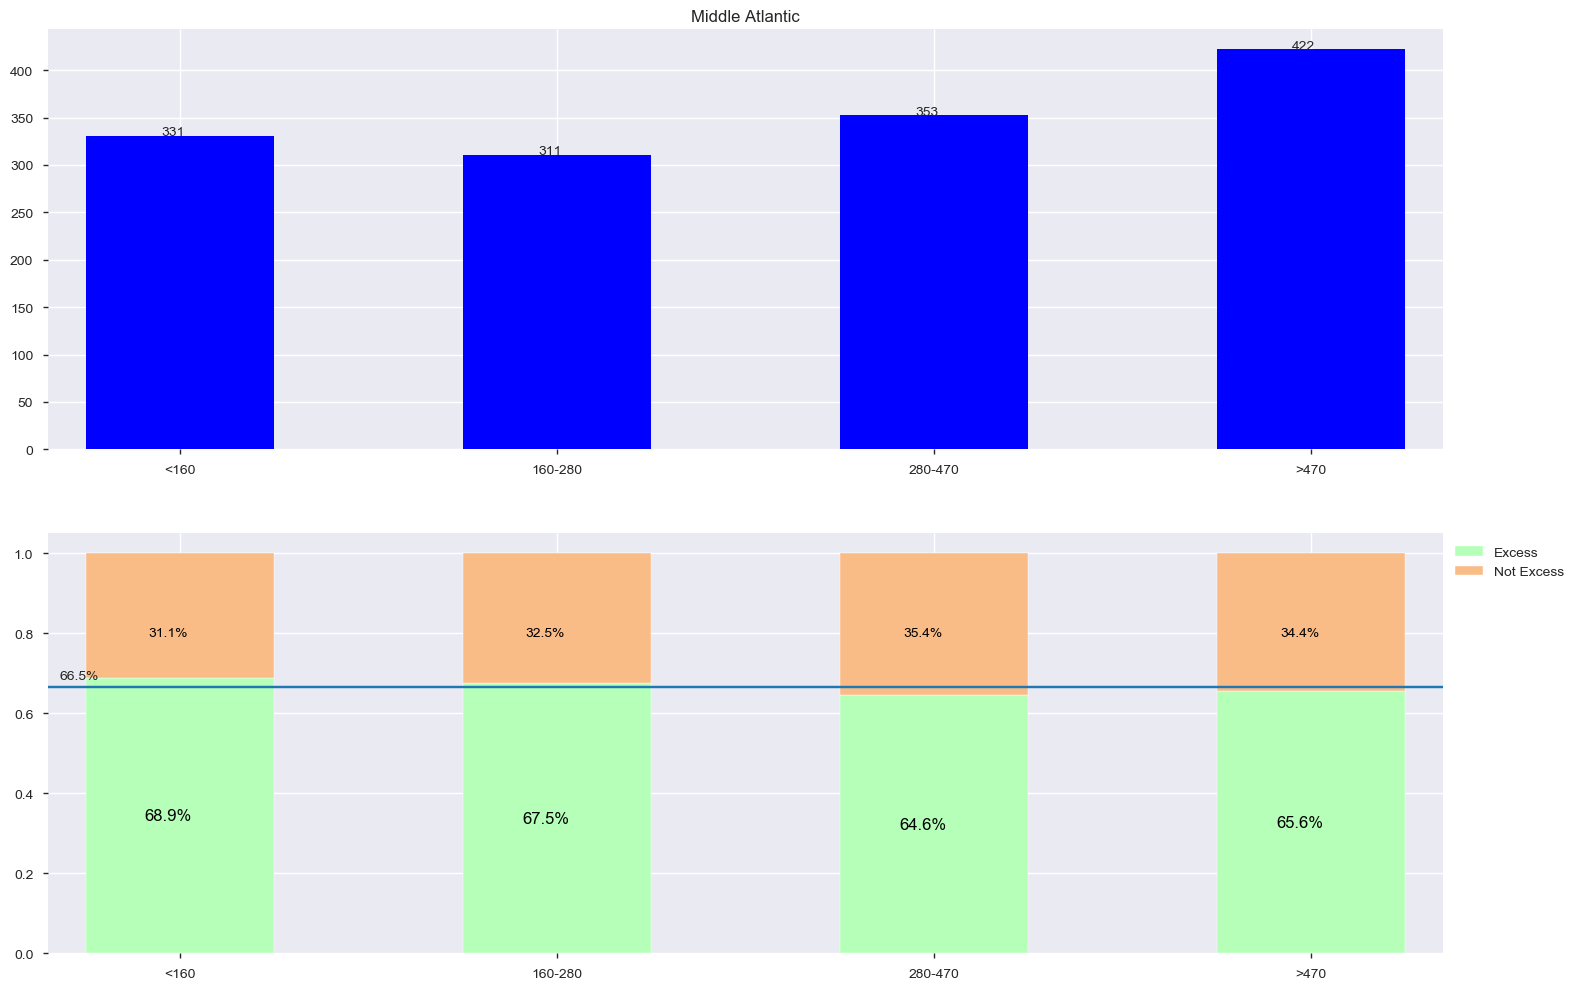

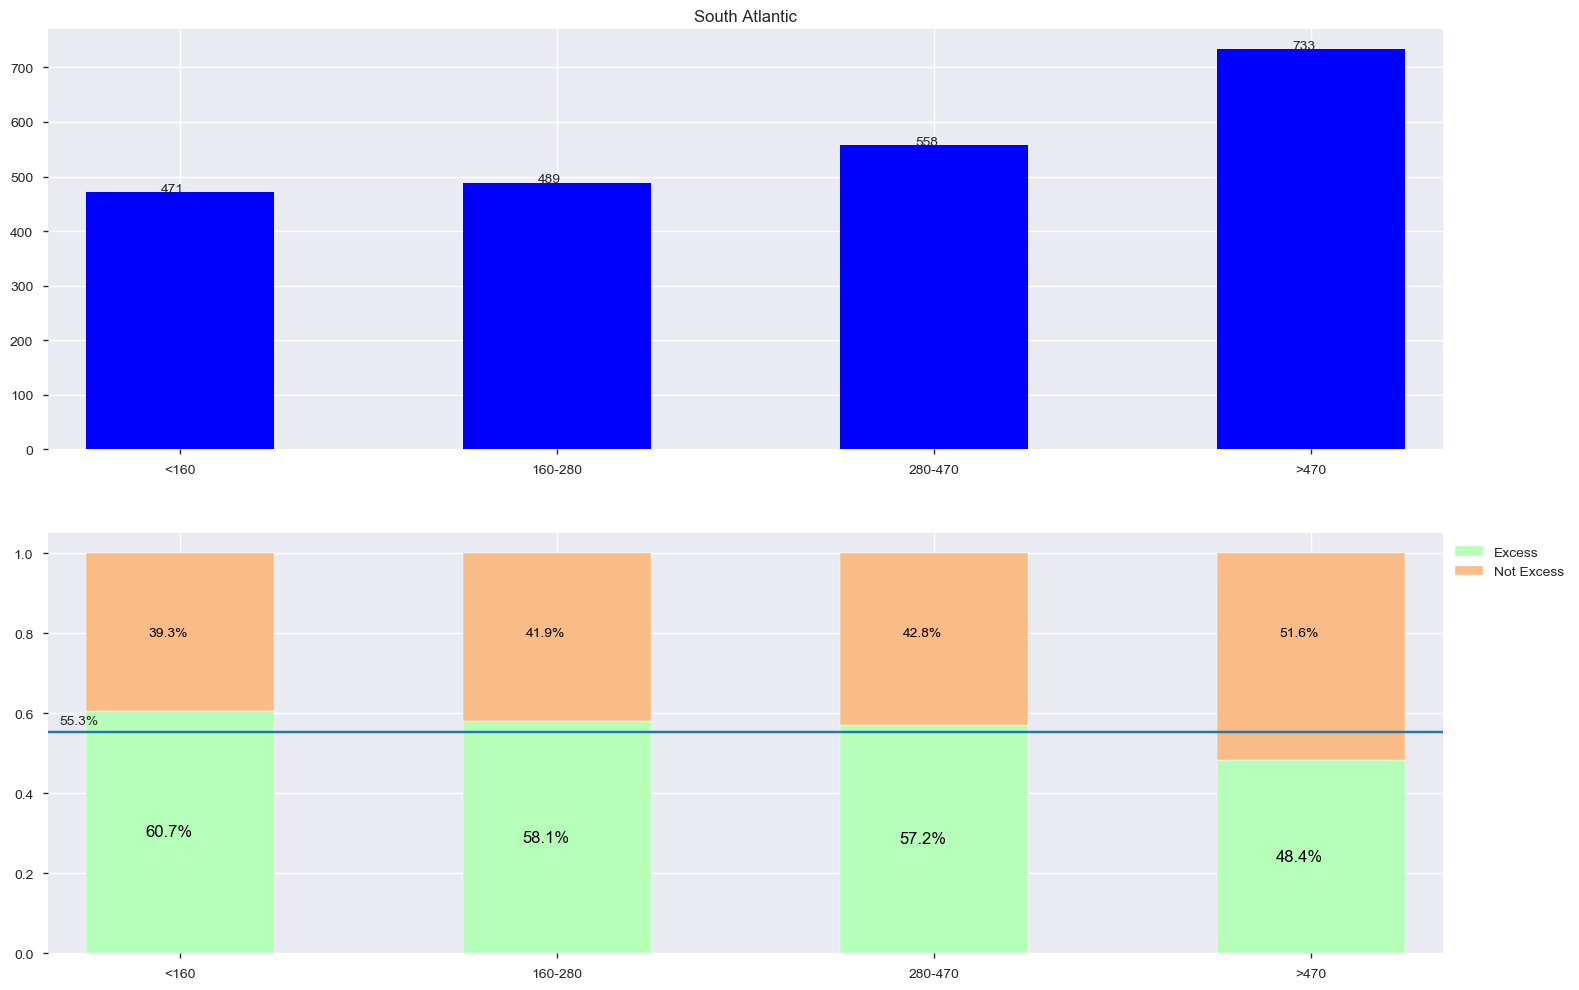

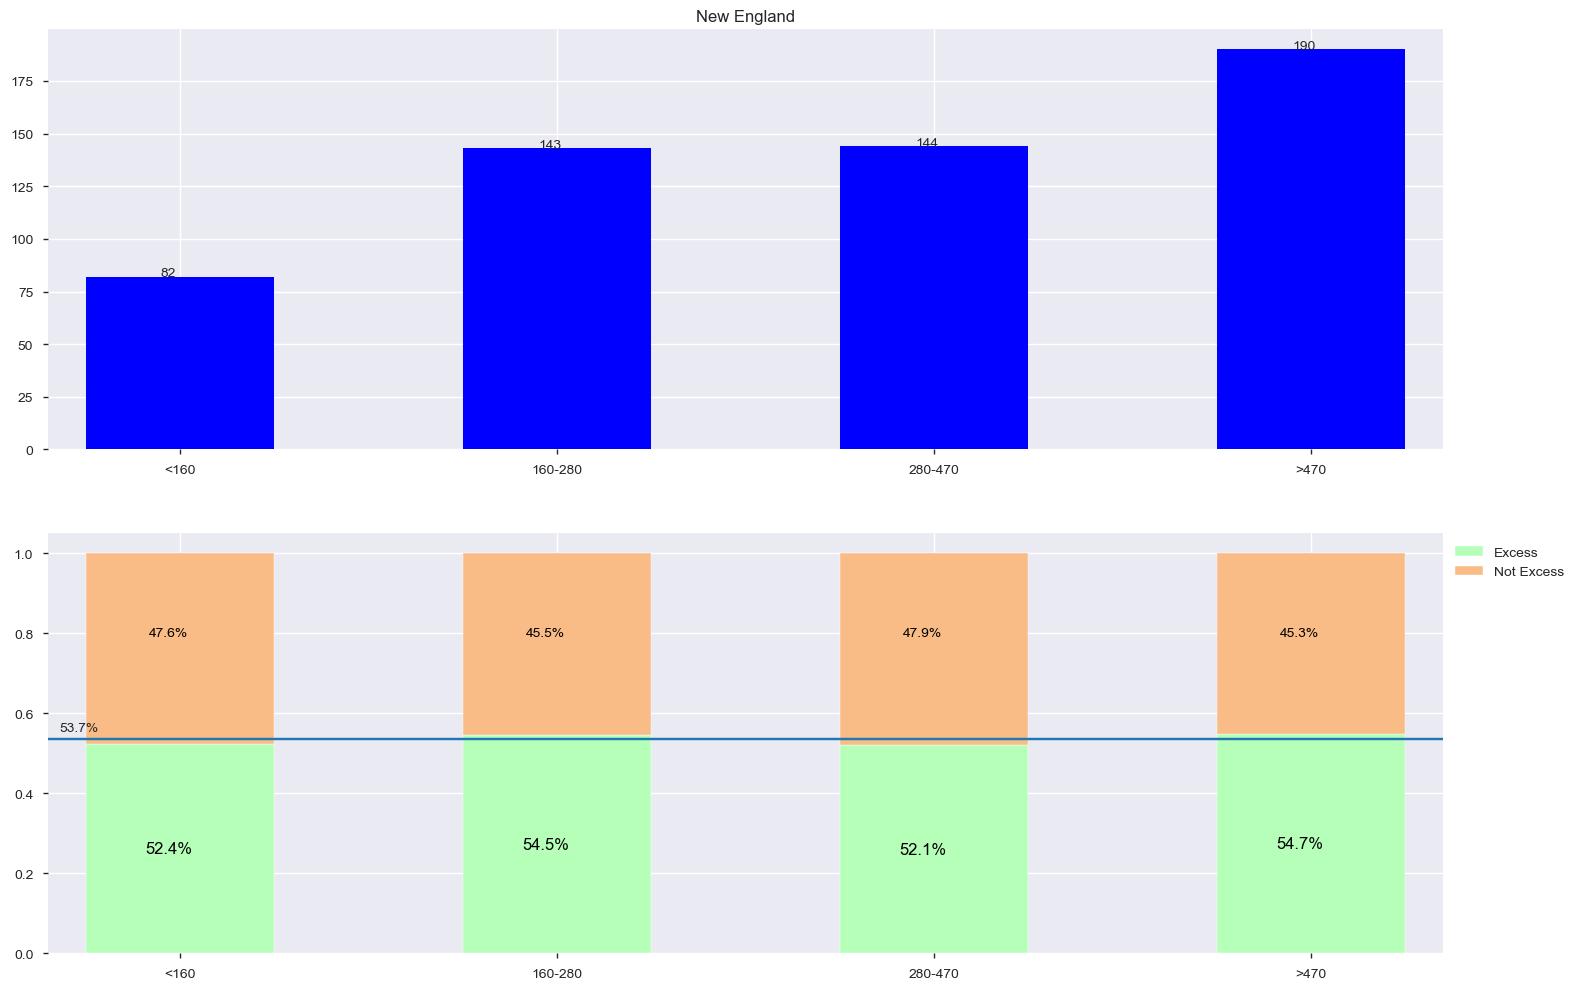

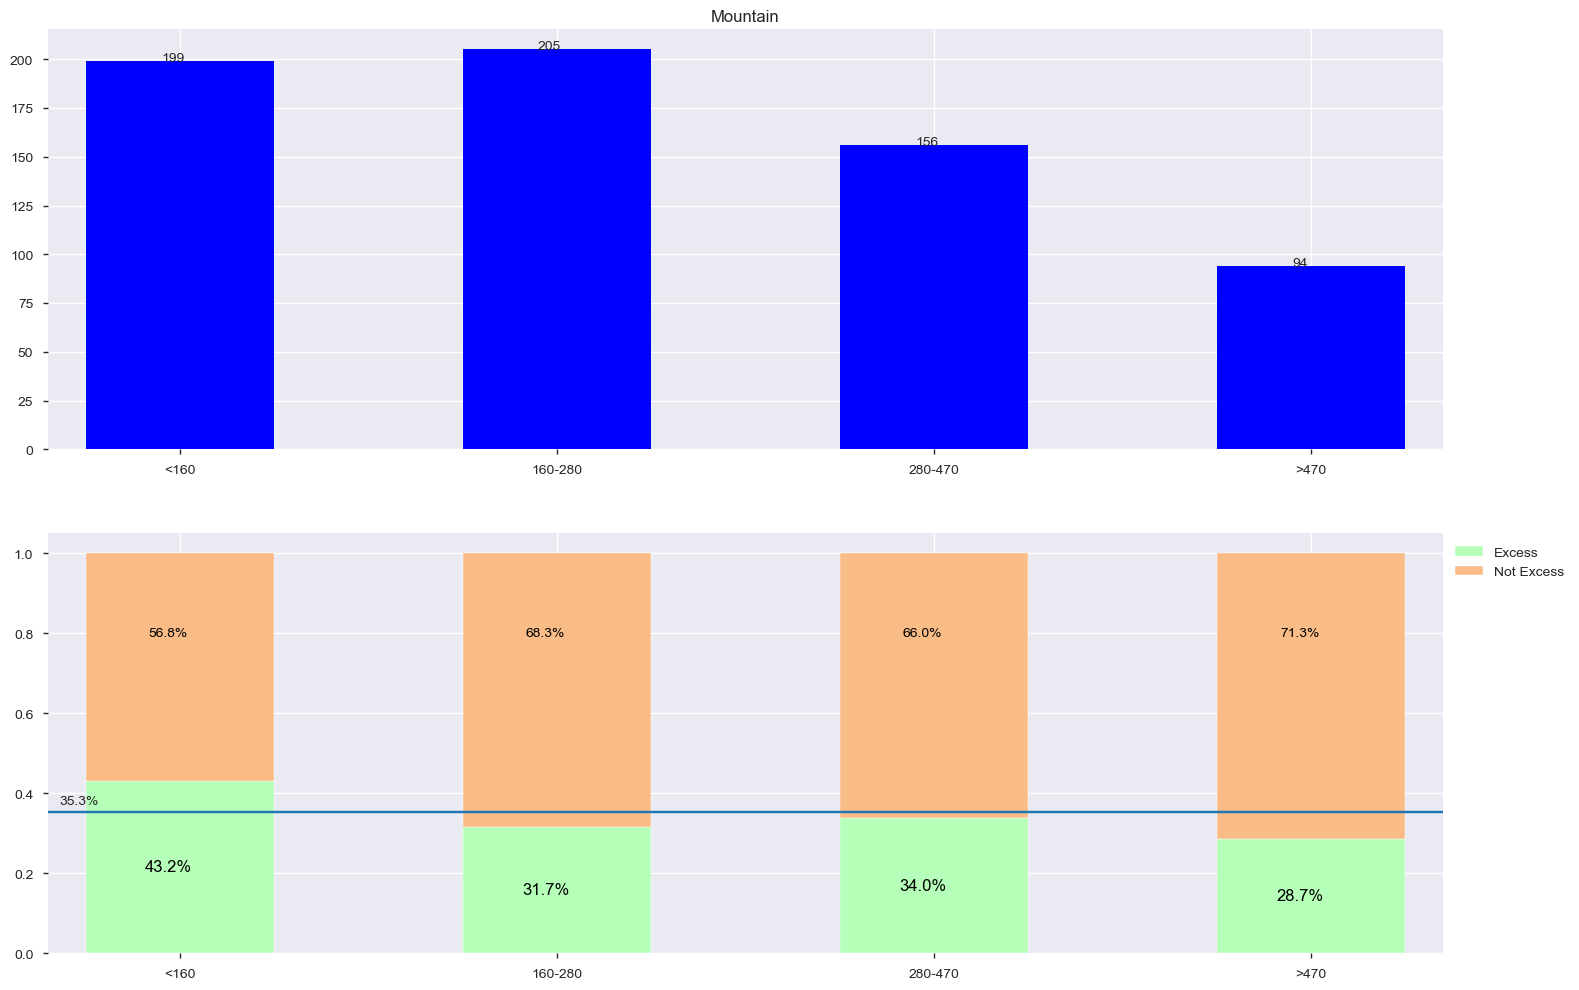

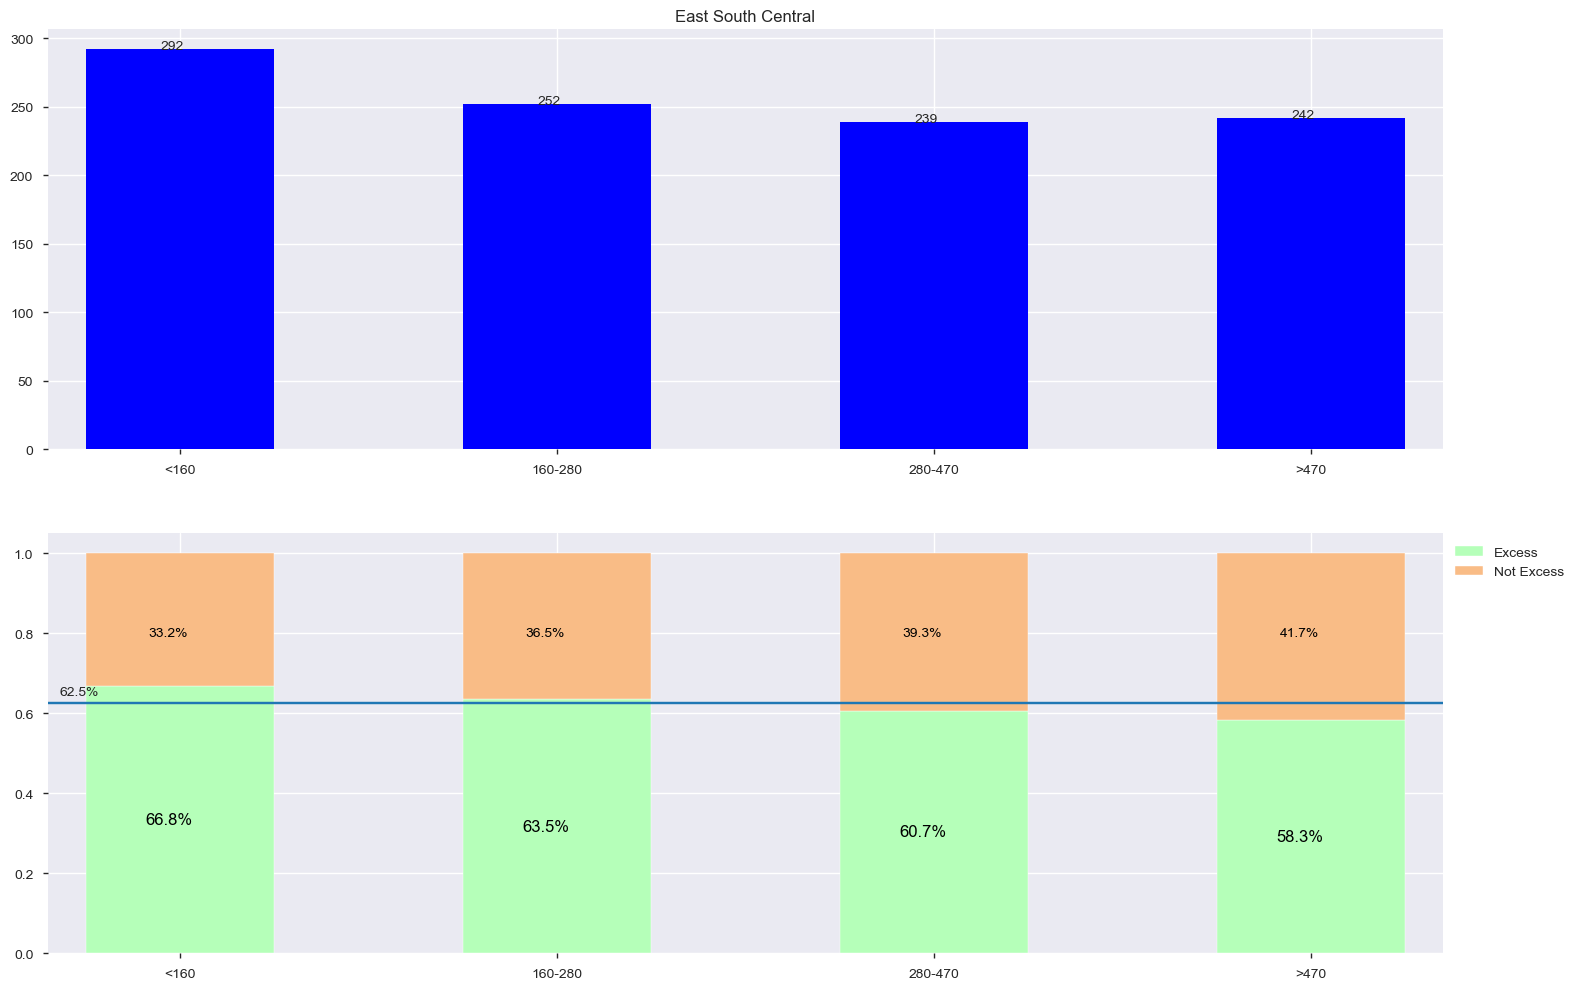

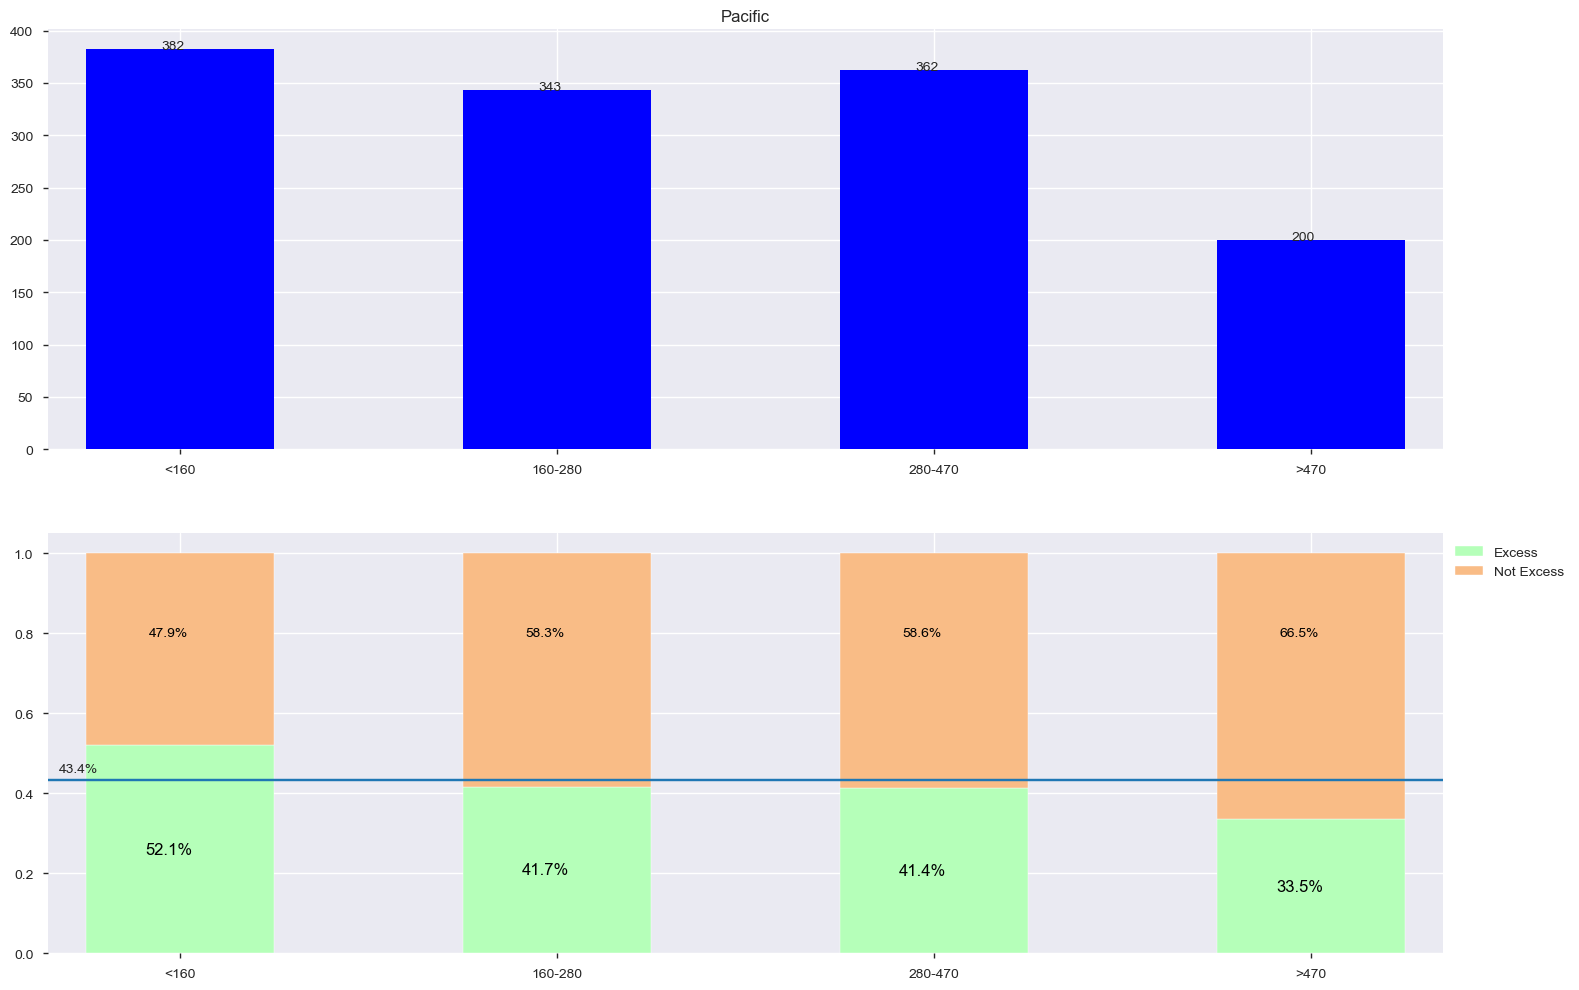

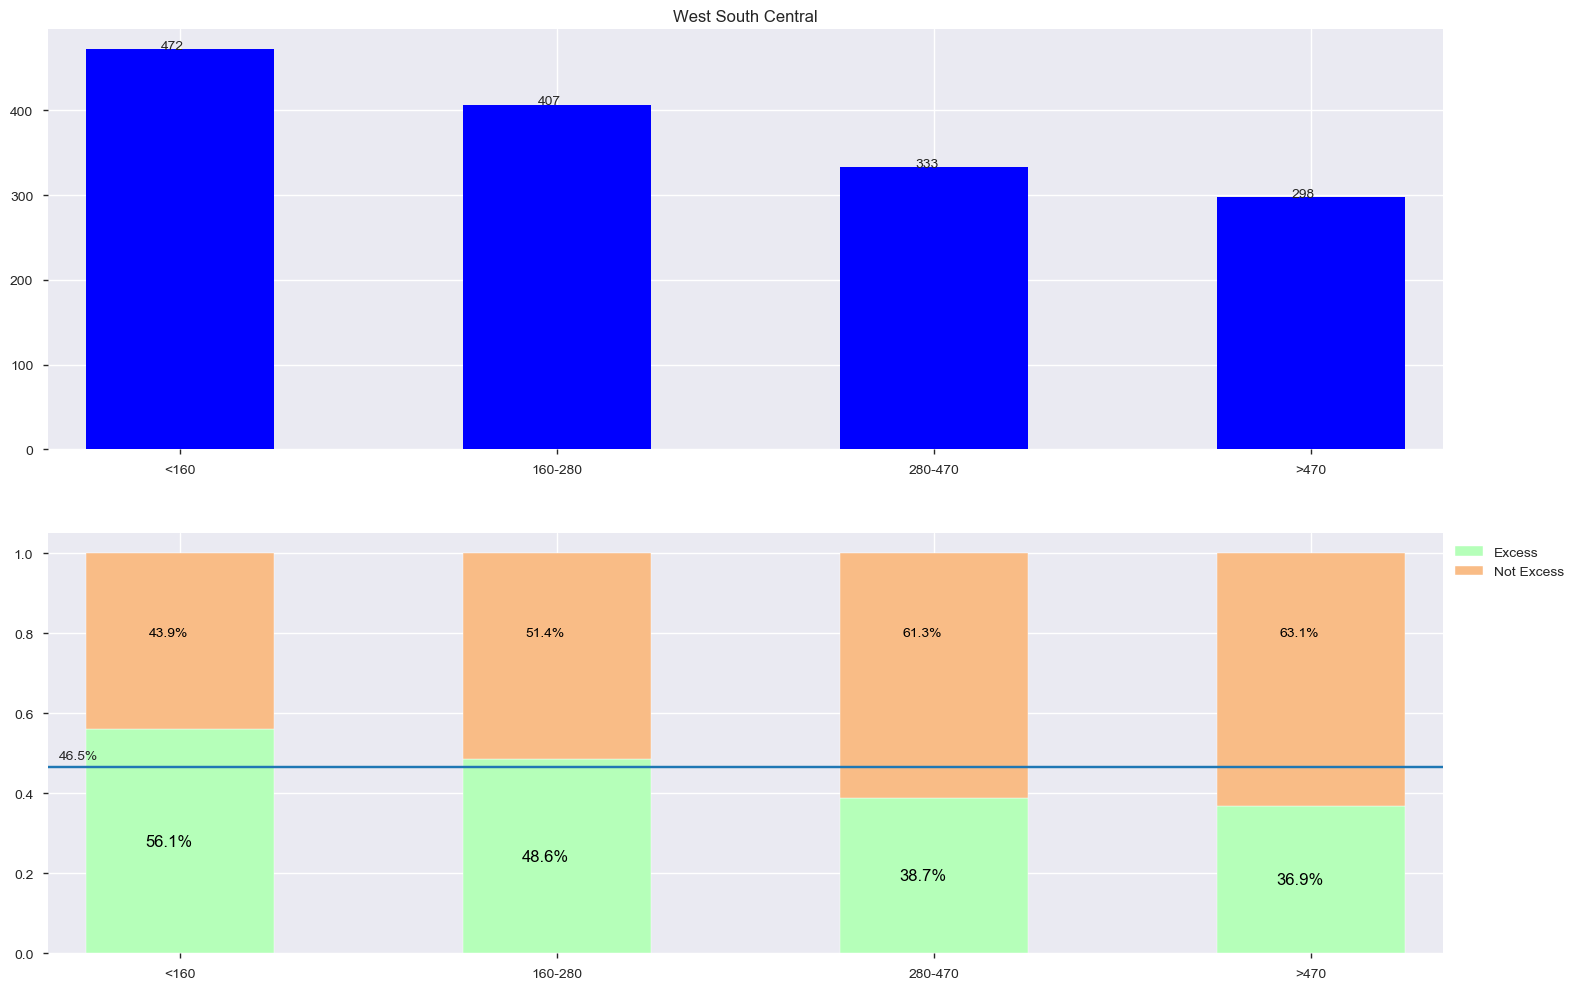

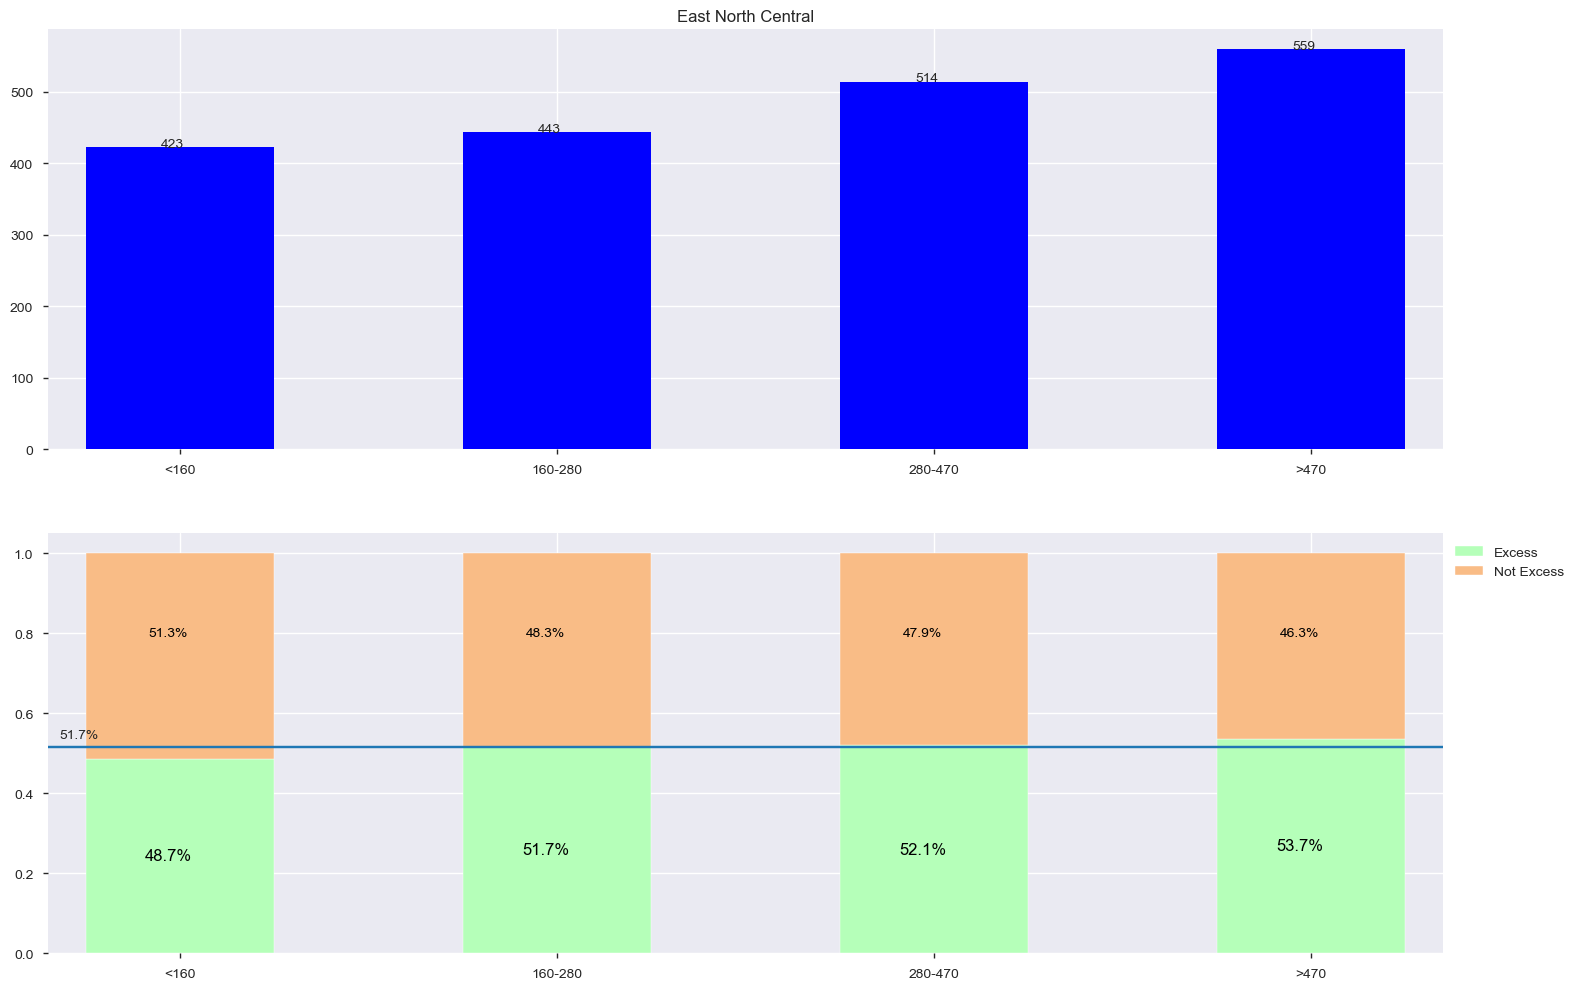

In [104]:
for i in set(df.region):
#     print(i)
# i='West North Central'
    temp = df.loc[df.region==i]#.loc[df['Number of Discharges']<1000]
    temp['reg_cat'] = np.digitize(temp['Number of Discharges'], bins)
    # temp
    m = {0:'<'+str(bins[0]), 1:str(bins[0])+'-'+str(bins[1]),2:str(bins[1])+'-'+str(bins[2]),
         3:'>'+str(bins[2])}
    PerStackBar_label_two('reg_cat',df=temp, m=m,title=i)

From the plots above, we can tell that different regions have different excess rate for different number of discharges. Now I want to carry out $\chi^2$ test to check if hospitals with different number of discharges have different excess rate in different regions.

In [119]:
import scipy.stats as ss
def chi2test(col, df, title):
    chi2_stat, p_val, dof, ex = ss.chi2_contingency(np.array(pd.crosstab(df[col], df.excess)))
    return print('The chi-square test shows that the p-value for independence test between number of discharges in '
                 + title + ' and excess is ' + str(round(p_val,2))
                 + str(['. IMPACT exists! ' if p_val<.05 else '. NO IMPACT. '][0]))

In [120]:
for i in set(df.region):
    temp = df.loc[df.region==i]
    temp['reg_cat'] = np.digitize(temp['Number of Discharges'], bins)
    chi2test('reg_cat',temp, i)

The chi-square test shows that the p-value for independence test between number of discharges in West North Central and excess is 0.0. IMPACT exists! 
The chi-square test shows that the p-value for independence test between number of discharges in Middle Atlantic and excess is 0.64. NO IMPACT. 
The chi-square test shows that the p-value for independence test between number of discharges in South Atlantic and excess is 0.0. IMPACT exists! 
The chi-square test shows that the p-value for independence test between number of discharges in New England and excess is 0.95. NO IMPACT. 
The chi-square test shows that the p-value for independence test between number of discharges in Mountain and excess is 0.04. IMPACT exists! 
The chi-square test shows that the p-value for independence test between number of discharges in East South Central and excess is 0.2. NO IMPACT. 
The chi-square test shows that the p-value for independence test between number of discharges in Pacific and excess is 0.0. IMP

From the $\chi^2$ test results above, we can see that for hospitals in Middle Atlantic, New England, East South Central, and East North Central, there is the number of discharges does not influence whether a hospital has excess readmissions. In the other five regions, I find a significant relationship between the numnber of discharges and excess readmissions. What is more, by looking at each regions with significant results, I would like to do the following t-tests:
- West North Central: <280 vs. >280
- South Atlantic: <470 vs. >470
- Mountain: <160 vs. >160
- Pacific: <160 vs. >160
- West South Central: <280 vs. >280

In [139]:
def testind(a,b):
    t2, p2 = ss.ttest_ind(a,b)
    print("t = " + str(round(t2,2))+ ", p = " + str(round(2.00*p2,2))
          + str(['. IMPACT exists! ' if p2<.05 else '. NO IMPACT. '][0]))

In [140]:
reg_cut = {'West North Central':280, 'South Atlantic':470, 'Mountain':160,
          'Pacific':160, 'West South Central':280 }
for key, value in reg_cut.items():
    temp = df.loc[df.region==key]
    temp['reg_cat'] = np.digitize(temp['Number of Discharges'], [value])
    a = temp.loc[temp.reg_cat==0, 'excess']
    b = temp.loc[temp.reg_cat==1, 'excess']
    print(key+':')
    testind(a,b)

West North Central:
t = 4.34, p = 0.0. IMPACT exists! 
South Atlantic:
t = 4.55, p = 0.0. IMPACT exists! 
Mountain:
t = 2.81, p = 0.01. IMPACT exists! 
Pacific:
t = 4.1, p = 0.0. IMPACT exists! 
West South Central:
t = 5.74, p = 0.0. IMPACT exists! 


## Group By Region
Here are my conclusions and recommendations based on the group by region analysis.

**Conclusions**

+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates in the following regions:
    - West North Central
    - South Atlantic
    - Mountain
    - Pacific
    - West South Central

+ In these regions, smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
+ In Middle Atlantic, New England, East South Central, and East North Central, there is NO significant correlation between hospital capacity (number of discharges) and readmission rates.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (see cutoff number below) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Here is the cutoff number we recommend for each region to define as small capacity. If Hospitals/facilties whose number of discharges are smaller than the number below in the corresponding region, they are defined as small capacity.
    - West North Central: 280
    - South Atlantic: 470
    - Mountain: 160
    - Pacific: 160
    - West South Central: 280

## Group By State

In [231]:
def chi2testv2(col, df, title):
    chi2_stat, p_val, dof, ex = ss.chi2_contingency(np.array(pd.crosstab(df[col], df.excess)))
#     print('The chi-square test shows that the p-value for independence test between number of discharges in '
#                  + title + ' and excess is ' + str(round(p_val,2))
#                  + str(['. IMPACT exists! ' if p_val<.05 else '. NO IMPACT. '][0]))
    return p_val

In [244]:
pvall=[]
for i in set(df.State):
    temp = df.loc[df.State==i]
    temp['reg_cat'] = np.digitize(temp['Number of Discharges'], [280])
    pvall.append(chi2testv2('reg_cat',temp, i))

In [245]:
pvalstate = pd.DataFrame({'state':list(set(df.State)),'p':pvall})
pvalstate.loc[pvalstate.p<=0.05]

,state,p
6,TX,0.000009
7,MI,0.001044
12,SD,0.010722
15,FL,0.046604
16,LA,0.000104
17,KS,0.034312
22,CA,0.012803
23,IL,0.017699
25,MN,0.041352
27,NJ,0.042322


In [246]:
def testindv2(a,b):
    t2, p2 = ss.ttest_ind(a,b)
    return p2

In [255]:
pvall=[]
amean=[]
bmean=[]
for i in set(df.State):
    temp = df.loc[df.State==i]
    temp['reg_cat'] = np.digitize(temp['Number of Discharges'], [280])
    a = temp.loc[temp.reg_cat==0, 'excess']
    b = temp.loc[temp.reg_cat==1, 'excess']
    pvall.append(testindv2(a,b))
    amean.append(np.mean(a))
    bmean.append(np.mean(b))
pvalstate = pd.DataFrame({'state':list(set(df.State)),'p':pvall, '<160':amean, '>160':bmean})
pvalstate.loc[pvalstate.p<=0.05]

,state,p,<160,>160
6,TX,0.000006,0.461538,0.311688
7,MI,0.000672,0.395833,0.577273
12,SD,0.002030,0.333333,0.000000
15,FL,0.038641,0.606178,0.525843
16,LA,0.000048,0.675497,0.413043
17,KS,0.021071,0.363636,0.180000
22,CA,0.010574,0.520599,0.436090
23,IL,0.013764,0.684444,0.580128
25,MN,0.025825,0.480392,0.275000
27,NJ,0.028894,0.848101,0.724138


From the results above, we can tell that for MI and WV, the larger hospital/facilities have larger excess readmission rate. I want to furthur investigate these two states.

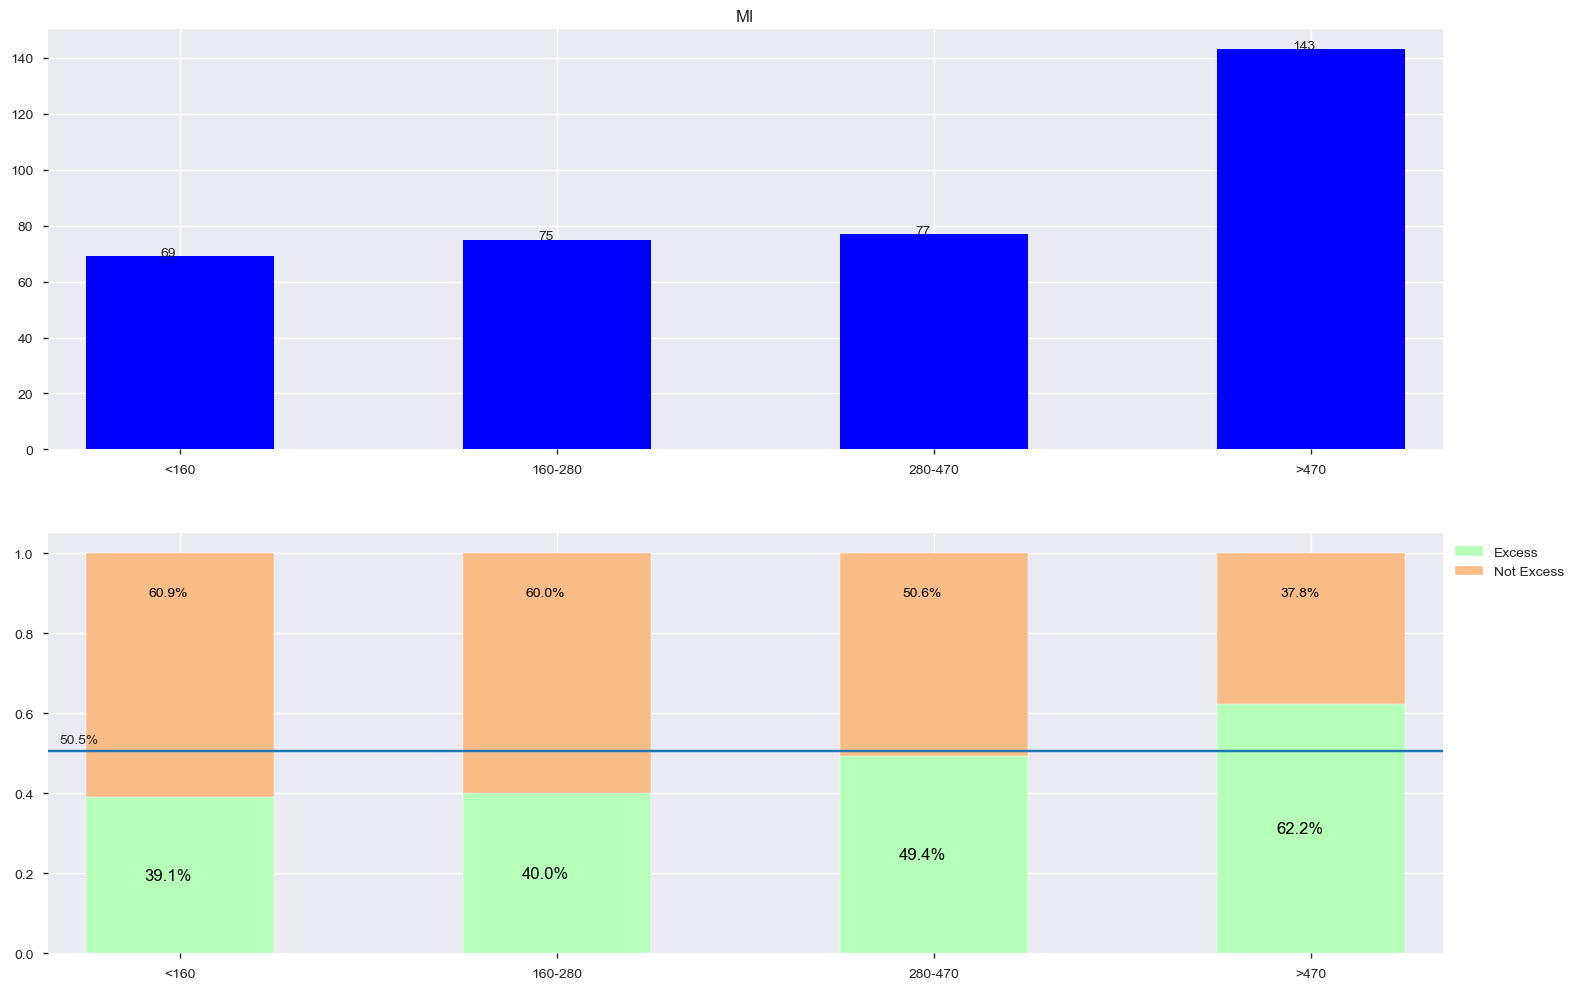

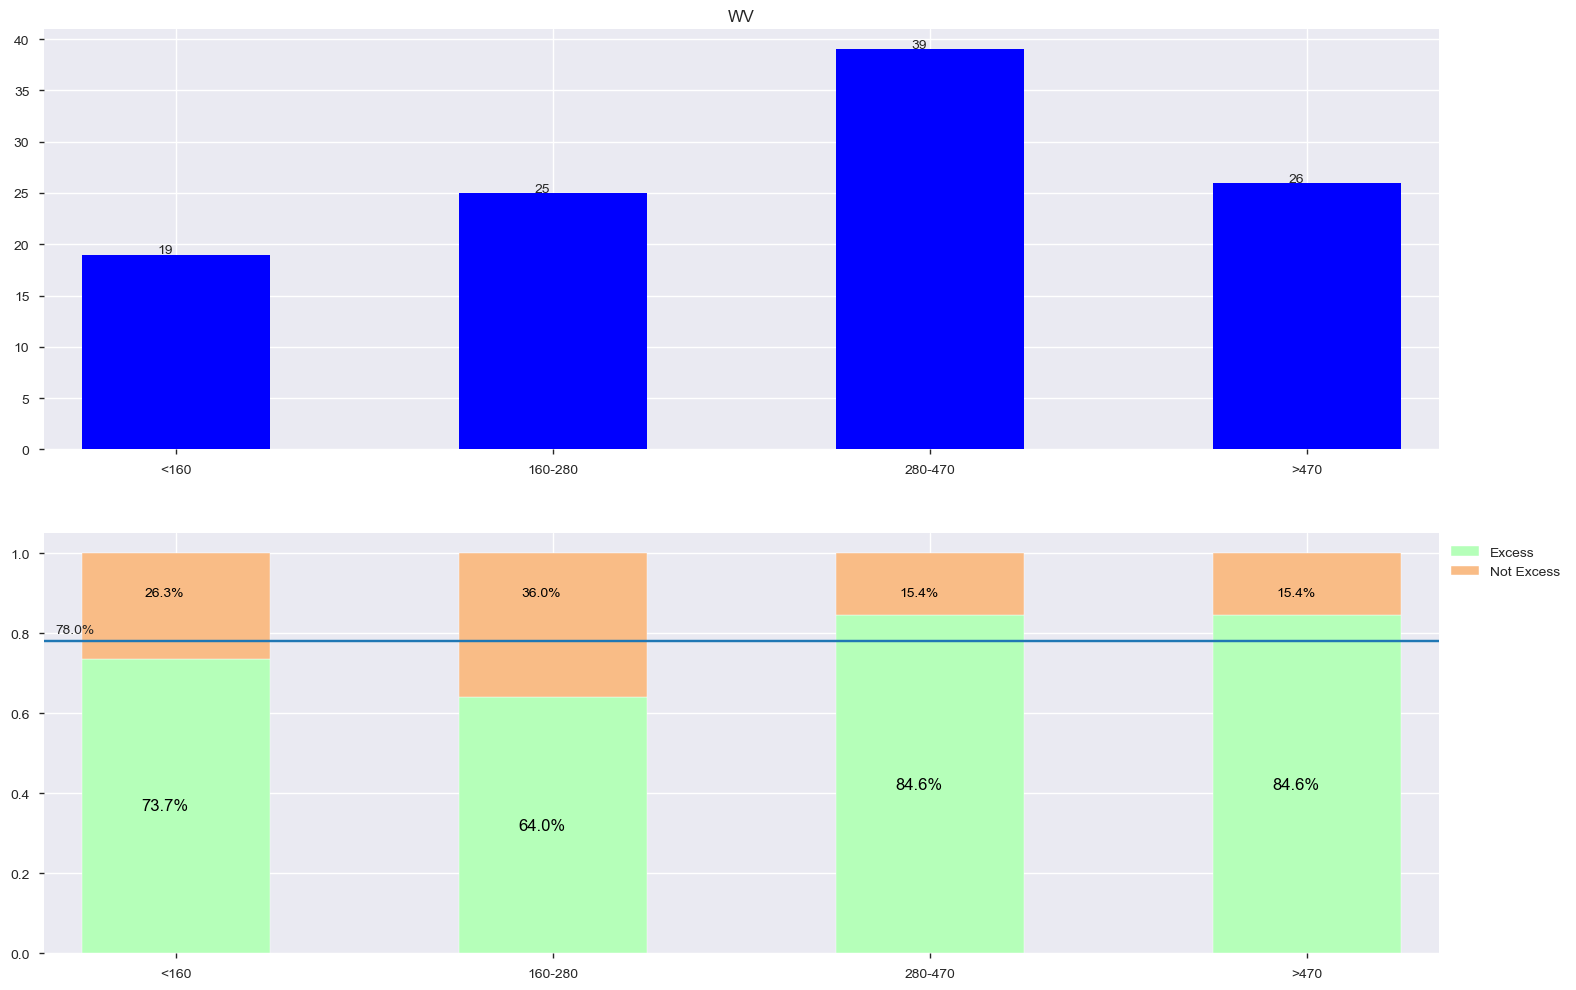

In [259]:
for i in ['MI', 'WV']:
    temp = df.loc[df.State==i]#.loc[df['Number of Discharges']<1000]
    temp['reg_cat'] = np.digitize(temp['Number of Discharges'], bins)
    # temp
    m = {0:'<'+str(bins[0]), 1:str(bins[0])+'-'+str(bins[1]),2:str(bins[1])+'-'+str(bins[2]),
         3:'>'+str(bins[2])}
    PerStackBar_label_two('reg_cat',df=temp, m=m,title=i)

In [256]:
df['discat'] = np.digitize(df['Number of Discharges'], [280])
metrics_df = df.groupby(['State', 'discat']).mean().excess.reset_index()
# m = {0:'<'+str(bins[0]), 1:str(bins[0])+'-'+str(bins[1]),2:str(bins[1])+'-'+str(bins[2]),
#          3:'>'+str(bins[2])}
m = {0:'<'+str(bins[0]), 1:'>'+str(bins[0])}
metrics_df['label'] = metrics_df.discat.apply(lambda x: m[x])

metrics_df = metrics_df.pivot(index='State',columns='label', values=['excess']).reset_index()

metrics_df['overall'] = metrics_df.iloc[:,1:].mean(axis=1)
metrics_df.head()
# metrics.iloc[:,1]
for col in metrics_df.columns[1:]:
    metrics_df[col] = metrics_df[col].apply(lambda x: str(round(x,2)))
# metrics_df.head()

In [252]:
# Now it comes the part where we plot out plotly United States map
import plotly.plotly as py
import plotly.graph_objs as go


   
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['State'] + '<br>' +\
'<280: ' + metrics_df.iloc[:,1]+ '<br>' +\
'>280: ' + metrics_df.iloc[:,2]#+ '<br>' +\
# '280-470: ' + metrics_df.iloc[:,2] + '<br>'+\
# '>470: ' + metrics_df.iloc[:,4] 
metrics_df.head()

data = [ dict(
        type='choropleth',
        colorscale = 'Viridis',
        reversescale=True,
#         autocolorscale = False,
        locations = metrics_df['State'],
        z = metrics_df['overall'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Excess Readmission Rate")
        ) ]


layout = dict(
    title = 'Excess Readmission Rate in Each State',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

# fig = dict(data= data, layout=layout)
# py.iplot(fig, filename='d3-cloropleth-map')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# plt.savefig('mapplot')

In [265]:
pvalstate.loc[pvalstate.p<=0.05,'state'].values

array(['TX', 'MI', 'SD', 'FL', 'LA', 'KS', 'CA', 'IL', 'MN', 'NJ', 'SC',
       'WV', 'OR', 'GA'], dtype=object)

## Group By State
Here are my conclusions and recommendations based on the group by state analysis.

**Conclusions**

+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates in the following states:
    - TX, MI, SD, FL, LA, KS, CA, IL, MN, NJ, SC, WV, OR, GA

+ In these states except for MI and WV, smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions
+ In MI and WV, larger hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions

**D. Regulatory policy recommendations**

In TX, SD, FL, LA, KS, CA, IL, MN, NJ, SC, OR, and GA:
+ Hospitals/facilties with small capacity (less than 280) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In MI and WV:
+ Hospitals/facilties with large capacity (larger than 280) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


## More Exploring
I am building logistic model and linear regression using the number of discharges for each state, or each region, prediction the excess readimission rate or whether a hospital readmit excessly. The results from logisitc regresion and linear regression are very similar. By looking at the signifcant level of each variable, we can see if the number of dischanges in each state/region has significant impacts on excess readmission. This would also work well as a method to determine the conclusions and recommendations.

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [227]:
# x = df[['Number of Discharges','State']]
# xtran = pd.get_dummies(x,drop_first=True)
# xtran = sm.add_constant(xtran)
# y = df[ 'Excess Readmission Ratio']
# model = sm.OLS(y,xtran).fit()
# print(model.summary())

In [216]:
# x = df[['Number of Discharges','region']]
# xtran = pd.get_dummies(x,drop_first=True)
# xtran = sm.add_constant(xtran)
# y = df[ 'Excess Readmission Ratio']
stat = df[['Number of Discharges','region','Excess Readmission Ratio']]
stat.columns=['discharges', 'region', 'ratio']
# stat['region'] = stat.region.apply(lambda x: ''.join(x.split()))
model = smf.ols(formula='ratio ~ discharges : region', data=stat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     78.70
Date:                Mon, 21 Jan 2019   Prob (F-statistic):          3.37e-142
Time:                        22:50:12   Log-Likelihood:                 11467.
No. Observations:               11497   AIC:                        -2.291e+04
Df Residuals:                   11487   BIC:                        -2.284e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [219]:
stat = df[['Number of Discharges','State','Excess Readmission Ratio']]
stat.columns=['discharges', 'State', 'ratio']
# stat['region'] = stat.region.apply(lambda x: ''.join(x.split()))
model = smf.ols(formula='ratio ~ discharges : State', data=stat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     27.58
Date:                Mon, 21 Jan 2019   Prob (F-statistic):          1.04e-244
Time:                        22:53:47   Log-Likelihood:                 11789.
No. Observations:               11497   AIC:                        -2.347e+04
Df Residuals:                   11445   BIC:                        -2.309e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0257 

In [223]:
stat = df[['Number of Discharges','State','excess']]
stat.columns=['discharges', 'State', 'excess']
# stat['region'] = stat.region.apply(lambda x: ''.join(x.split()))
model = smf.logit(formula='excess ~ discharges : State', data=stat).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.654491
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 excess   No. Observations:                11497
Model:                          Logit   Df Residuals:                    11445
Method:                           MLE   Df Model:                           51
Date:                Mon, 21 Jan 2019   Pseudo R-squ.:                 0.05502
Time:                        22:59:10   Log-Likelihood:                -7524.7
converged:                       True   LL-Null:                       -7962.8
                                        LLR p-value:                9.587e-151
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3877      0.033     11.910      0.000       0.324       0.452

In [224]:
stat = df[['Number of Discharges','region','excess']]
stat.columns=['discharges', 'region', 'excess']
# stat['region'] = stat.region.apply(lambda x: ''.join(x.split()))
model = smf.logit(formula='excess ~ discharges : region', data=stat).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.674631
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 excess   No. Observations:                11497
Model:                          Logit   Df Residuals:                    11487
Method:                           MLE   Df Model:                            9
Date:                Mon, 21 Jan 2019   Pseudo R-squ.:                 0.02594
Time:                        23:00:01   Log-Likelihood:                -7756.2
converged:                       True   LL-Null:                       -7962.8
                                        LLR p-value:                 2.159e-83
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.3004      

In [225]:
# x = df[['Number of Discharges','region']]
# xtran = pd.get_dummies(x,drop_first=True)
# xtran = sm.add_constant(xtran)
# y = df[ 'excess']
# model = sm.Logit(y,xtran).fit()
# print(model.summary())

In [226]:
# x = df[['Number of Discharges','State']]
# xtran = pd.get_dummies(x,drop_first=True)
# xtran = sm.add_constant(xtran)
# y = df[ 'excess']
# model = sm.Logit(y,xtran).fit()
# print(model.summary())